cleaning data dulu 
ngisi data yang kosong pake value "tidak ada data"
df = pd.read_csv('indonesian_movies.csv') = buat baca data set nya
terus kalo udah di filter tinggal di save aja hasil data bersih nya

In [ ]:
import pandas as pd

df = pd.read_csv('indonesian_movies.csv')
df['description'] = df['description'].fillna("tidak ada data")
df['rating'] = df['rating'].fillna("tidak ada data")
df['genre'] = df['genre'].fillna("tidak ada data")
df['directors'] = df['directors'].fillna("tidak ada data")
df['runtime'] = df['runtime'].fillna("tidak ada data")
df.to_csv('data_resik.csv', index=False)


kalo sudah kita masukin data yang sudah bersih tadi
lalu kita filter untuk mendapatkan hasil user rating di bawah 7 dan di kelompokan berdasarkan tahunnya

In [33]:
dr = pd.read_csv('data_resik.csv', usecols=['title', 'users_rating', 'year', 'genre'])
rate = df[df['users_rating'] > 7]
rating = rate.groupby('year').size()

kalo sudah tinggal ploting saja

In [ ]:
import matplotlib.pyplot as plt
#ploting plot
plt.figure(figsize=(8, 5))
rating.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Jumlah Film dengan Rating > 7 Berdasarkan Tahun', fontsize=14)
plt.xlabel('year', fontsize=12)
plt.ylabel('Jumlah Film', fontsize=12)
plt.tight_layout()
plt.show()


pembuatan tren genre per tahun 

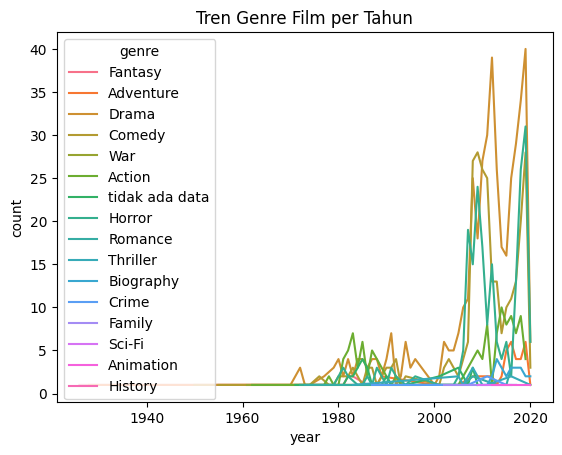

year
1926    1
1928    1
1950    1
1951    1
1953    1
       ..
2016    9
2017    8
2018    7
2019    6
2020    7
Name: count, Length: 62, dtype: int64


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

dr = dr.explode('genre')
genre_counts = dr.groupby(['year', 'genre']).size().reset_index(name='count')


sns.lineplot(data=genre_counts, x='year', y='count', hue='genre')
plt.title('Tren Genre Film per Tahun')
plt.show()
print(genre_counts['year'].value_counts().sort_index())



21:31:07 - cmdstanpy - INFO - Chain [1] start processing
21:31:08 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\ACER\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


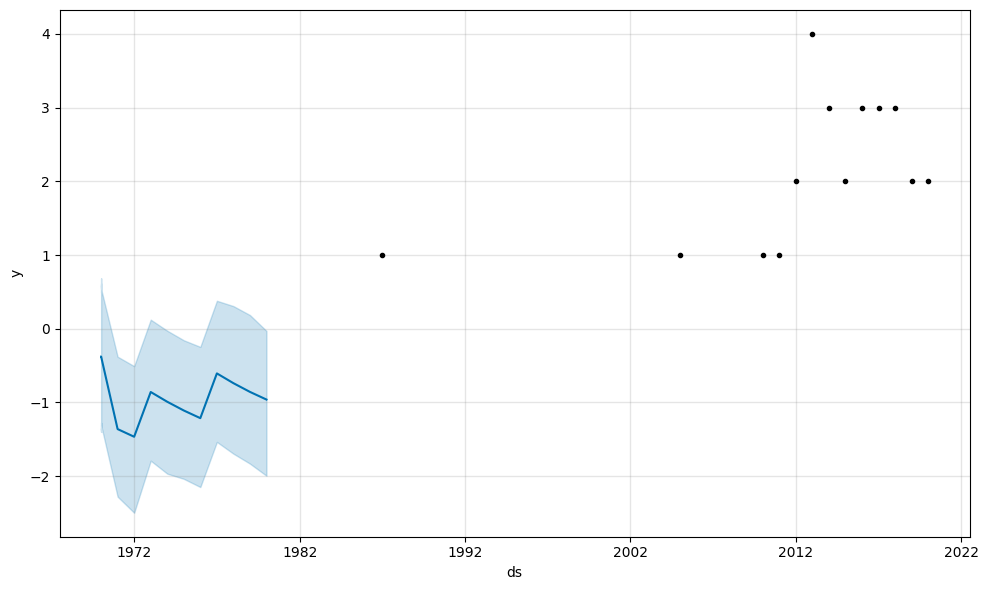

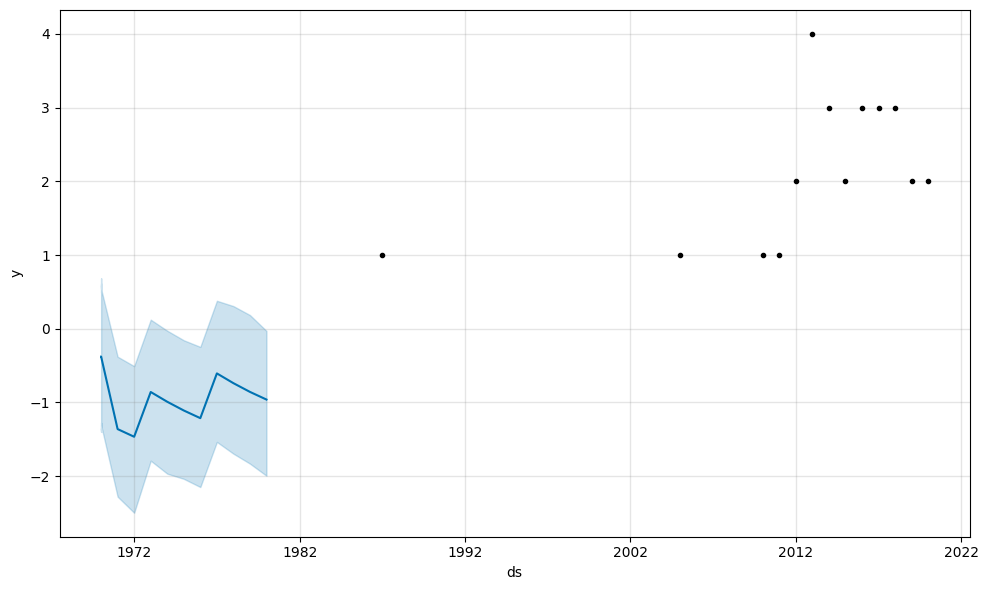

In [38]:
from prophet import Prophet

# Filter data untuk satu genre tertentu
genre_trend = genre_counts[genre_counts['genre'] == 'Biography']
genre_trend = genre_trend.rename(columns={'year': 'ds', 'count': 'y'})

model = Prophet()
model.fit(genre_trend)

future = model.make_future_dataframe(periods=10, freq='Y')
forecast = model.predict(future)

model.plot(forecast)
